# Selected Genes 2 Grp Analysis
Zeel Thakkar, March 25 2021

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

In [3]:
betas = pd.read_csv("~/Desktop/research/beta_normalised_bmiq_csv.csv") 
betas_df=pd.DataFrame(betas)
betas_df = betas_df.rename(columns={"Unnamed: 0":"ID_Column"})

In [5]:
sample_list = list(betas)[1:]

In [6]:
ilum = pd.read_csv("~/Desktop/research/IluminaManifestShortened.csv")

/Users/zeel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
ilum_df = pd.DataFrame(ilum)
ilum_df = ilum_df.rename(columns={"IlmnID":"ID_Column"})

In [8]:
combined_df=pd.merge(betas_df,ilum_df,on="ID_Column")
combined_df_no_nan = combined_df.dropna()

In [39]:
vtrna2_1 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("VTRNA2-1")]
vtrna2_1 #none found

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group


In [9]:
pax8 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("PAX8")]

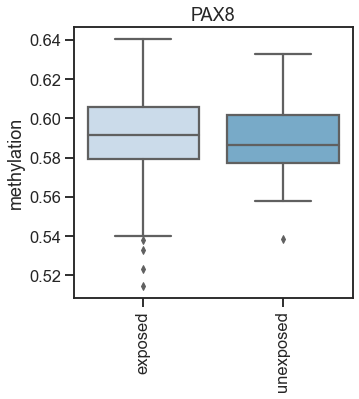

In [24]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(pax8[sample].mean())
        if "A" in sample:
            group_ids.append("exposed")
        elif "B" in sample:
            group_ids.append("exposed")
        else:
            group_ids.append("unexposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("PAX8")
plt.show()

In [25]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.639857
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      134
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:               9.586e-07
Time:                        22:45:57   Log-Likelihood:                -87.021
converged:                       True   LL-Null:                       -87.021
Covariance Type:            nonrobust   LLR p-value:                    0.9897
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6117      4.610     -0.133      0.894      -9.646       8.423
x1             -0.1009    

In [27]:
prdm9 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("PRDM9")]
prdm9

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
29700,cg02444433,0.674426,0.847333,0.812884,0.795026,0.731239,0.669756,0.700830,0.694102,0.742943,...,0.805917,0.710328,0.726856,0.735449,0.677153,cg02444433,5,23507469.0,PRDM9,TSS1500
33136,cg19837938,0.639631,0.769217,0.686833,0.688180,0.665896,0.596256,0.674341,0.674059,0.658934,...,0.741903,0.622679,0.676555,0.645526,0.567747,cg19837938,5,23507458.0,PRDM9,TSS1500
33464,cg22054885,0.654429,0.807015,0.743543,0.702875,0.691301,0.625445,0.667405,0.670098,0.651924,...,0.782263,0.663443,0.704231,0.701603,0.632687,cg22054885,5,23507450.0,PRDM9,TSS1500
34135,cg25472530,0.595039,0.699835,0.478047,0.556732,0.549701,0.555634,0.546937,0.530808,0.441851,...,0.754779,0.563676,0.559342,0.672983,0.346615,cg25472530,5,23507617.0,PRDM9,TSS200
200629,cg01667892,0.803838,0.853986,0.670770,0.659362,0.619413,0.729197,0.663608,0.647417,0.459512,...,0.848302,0.756458,0.700940,0.800129,0.417785,cg01667892,5,23507656.0,PRDM9,TSS200
202348,cg04362002,0.610212,0.672689,0.679289,0.698222,0.629584,0.647265,0.626123,0.583045,0.598941,...,0.641396,0.619511,0.652244,0.633933,0.543514,cg04362002,5,23506738.0,PRDM9,TSS1500
206063,cg10589310,0.714448,0.824921,0.757756,0.701842,0.705482,0.714315,0.698348,0.688804,0.731211,...,0.771215,0.734222,0.709485,0.725274,0.622027,cg10589310,5,23507030.0,PRDM9,TSS1500
212562,cg22079902,0.731161,0.837117,0.719801,0.711388,0.698029,0.797029,0.698013,0.697721,0.568660,...,0.853100,0.737527,0.660960,0.891717,0.493343,cg22079902,5,23507644.0,PRDM9,TSS200


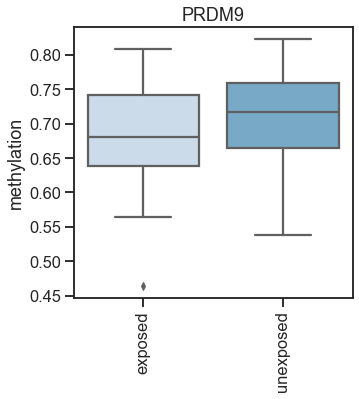

In [29]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(prdm9[sample].mean())
        if "A" in sample:
            group_ids.append("exposed")
        elif "B" in sample:
            group_ids.append("exposed")
        else:
            group_ids.append("unexposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("PRDM9")
plt.show()


In [30]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.629732
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      134
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:                 0.01583
Time:                        22:48:16   Log-Likelihood:                -85.644
converged:                       True   LL-Null:                       -87.021
Covariance Type:            nonrobust   LLR p-value:                   0.09699
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.6600      1.849     -1.980      0.048      -7.283      -0.037
x1              4.2927    

In [32]:
zfp57 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("ZFP57")]

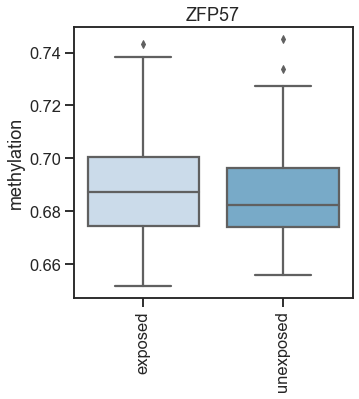

In [33]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(zfp57[sample].mean())
        if "A" in sample:
            group_ids.append("exposed")
        elif "B" in sample:
            group_ids.append("exposed")
        else:
            group_ids.append("unexposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("ZFP57")
plt.show()


In [34]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.637949
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      134
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:                0.002983
Time:                        22:48:58   Log-Likelihood:                -86.761
converged:                       True   LL-Null:                       -87.021
Covariance Type:            nonrobust   LLR p-value:                    0.4712
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9873      6.517      0.612      0.541      -8.786      16.761
x1             -6.7692    

In [37]:
bola = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("BOLA")]

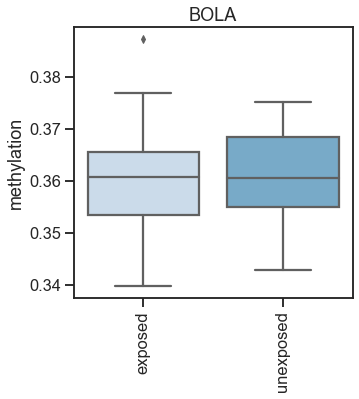

In [38]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(bola[sample].mean())
        if "A" in sample:
            group_ids.append("exposed")
        elif "B" in sample:
            group_ids.append("exposed")
        else:
            group_ids.append("unexposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("BOLA")
plt.show()


In [28]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.639315
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      134
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:               0.0008493
Time:                        23:32:50   Log-Likelihood:                -86.947
converged:                       True   LL-Null:                       -87.021
Covariance Type:            nonrobust   LLR p-value:                    0.7006
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0539      6.196     -0.493      0.622     -15.199       9.091
x1              5.8432    

In [9]:
exp3 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("EXP3")]
exp3 #none found

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group


In [11]:
cdk1 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("CDK1;")]

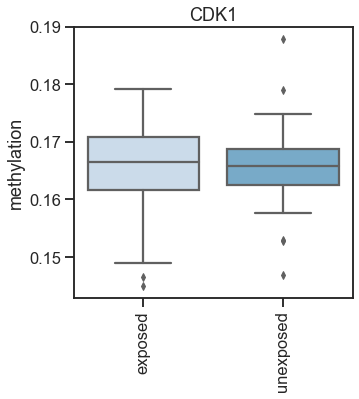

In [12]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(cdk1[sample].mean())
        if "A" in sample:
            group_ids.append("exposed")
        elif "B" in sample:
            group_ids.append("exposed")
        else:
            group_ids.append("unexposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("CDK1")
plt.show()


In [13]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.639331
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      134
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:               0.0008229
Time:                        23:04:07   Log-Likelihood:                -86.949
converged:                       True   LL-Null:                       -87.021
Covariance Type:            nonrobust   LLR p-value:                    0.7051
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9642      4.323      0.223      0.824      -7.509       9.437
x1             -9.8589    

In [14]:
hmga1 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("HMGA1")]
hmga1

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
37567,cg10167849,0.030310,0.039260,0.026580,0.032331,0.034788,0.041217,0.027798,0.030219,0.022808,...,0.027338,0.057942,0.023349,0.052845,0.017415,cg10167849,6,34206152.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;TSS1500
37580,cg10200629,0.054678,0.056000,0.039079,0.040266,0.045861,0.049530,0.029660,0.047369,0.029522,...,0.051371,0.043169,0.050877,0.049387,0.047008,cg10200629,6,34205665.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;TSS1500
38850,cg14590677,0.044811,0.043367,0.055658,0.051399,0.045694,0.042189,0.044816,0.047076,0.039992,...,0.056365,0.037039,0.046001,0.034877,0.045179,cg14590677,6,34204551.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS200;TSS200;TSS200;TSS200;TSS200
40010,cg18696576,0.171153,0.128497,0.117626,0.142497,0.114952,0.171014,0.122142,0.154616,0.118699,...,0.127412,0.139616,0.152366,0.156804,0.096223,cg18696576,6,34203630.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS1500;TSS1500;TSS1500;TSS1500;TSS1500
40412,cg20294304,0.116834,0.097384,0.054701,0.069540,0.134254,0.057123,0.137993,0.086223,0.091782,...,0.081864,0.082695,0.059201,0.063096,0.060270,cg20294304,6,34203153.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS1500;TSS1500;TSS1500;TSS1500;TSS1500
40651,cg21234474,0.049102,0.015302,0.046478,0.041822,0.014326,0.055261,0.041426,0.044047,0.050338,...,0.032785,0.051023,0.047613,0.043151,0.032632,cg21234474,6,34204646.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS200;5'UTR;5'UTR;TSS200;1stExon;1stExon;1stE...
216442,cg00544436,0.083596,0.065180,0.040703,0.051360,0.057136,0.176977,0.054699,0.058502,0.041392,...,0.046979,0.087065,0.048112,0.091897,0.039277,cg00544436,6,34203564.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS1500;TSS1500;TSS1500;TSS1500;TSS1500
217692,cg01745499,0.084627,0.060756,0.066778,0.069586,0.039750,0.168725,0.063636,0.044634,0.058804,...,0.050347,0.062199,0.057460,0.088577,0.050978,cg01745499,6,34206084.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;TSS1500
218583,cg02654940,0.480019,0.481155,0.400407,0.503271,0.515094,0.509432,0.435166,0.496928,0.489718,...,0.466464,0.410895,0.490602,0.358716,0.336767,cg02654940,6,34206400.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;TSS200
218977,cg03020951,0.032942,0.022796,0.020699,0.029276,0.020638,0.028068,0.021242,0.034415,0.023394,...,0.019114,0.034550,0.023895,0.036761,0.015384,cg03020951,6,34203887.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS1500;TSS1500;TSS1500;TSS1500;TSS1500


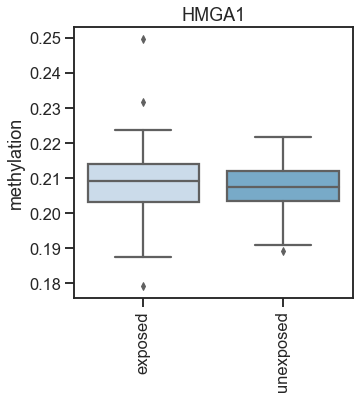

In [15]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(hmga1[sample].mean())
        if "A" in sample:
            group_ids.append("exposed")
        elif "B" in sample:
            group_ids.append("exposed")
        else:
            group_ids.append("unexposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("HMGA1")
plt.show()

In [16]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.635702
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      134
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:                0.006495
Time:                        23:04:40   Log-Likelihood:                -86.456
converged:                       True   LL-Null:                       -87.021
Covariance Type:            nonrobust   LLR p-value:                    0.2877
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0059      4.458      0.899      0.369      -4.732      12.743
x1            -22.4871    

In [17]:
dnajb6 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("DNAJB6")]
dnajb6

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
42608,cg00553120,0.014673,0.022551,0.015337,0.017652,0.025580,0.016776,0.015092,0.020022,0.018084,...,0.021212,0.014404,0.020900,0.017002,0.013928,cg00553120,7,157129669.0,DNAJB6;DNAJB6,TSS200;TSS200
42797,cg01410440,0.947754,0.927614,0.965224,0.949772,0.916905,0.942928,0.925675,0.890214,0.951849,...,0.925095,0.962896,0.871240,0.945548,0.958383,cg01410440,7,157193063.0,DNAJB6,Body
43584,cg04430780,0.898723,0.814323,0.878985,0.881536,0.831220,0.860137,0.905677,0.857601,0.871253,...,0.866313,0.882457,0.870085,0.897559,0.870665,cg04430780,7,157199439.0,DNAJB6,Body
44444,cg07569018,0.989066,0.979565,0.981869,0.987188,0.977933,0.987933,0.987511,0.980205,0.984975,...,0.987129,0.982868,0.980437,0.983302,0.987466,cg07569018,7,157202818.0,DNAJB6,Body
44546,cg08011146,0.921682,0.945544,0.952342,0.952932,0.947973,0.926855,0.950203,0.942614,0.930812,...,0.938573,0.916251,0.952936,0.913452,0.930698,cg08011146,7,157195815.0,DNAJB6,Body
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258216,cg26668151,0.057944,0.072047,0.040114,0.079807,0.119055,0.052331,0.103471,0.105213,0.057087,...,0.088833,0.032918,0.163039,0.030577,0.040775,cg26668151,7,157180005.0,DNAJB6,Body
258326,cg26860459,0.982082,0.983031,0.977855,0.980841,0.984416,0.979796,0.953531,0.957225,0.970877,...,0.985398,0.977647,0.982412,0.977254,0.975534,cg26860459,7,157199417.0,DNAJB6,Body
258425,cg27023755,0.971600,0.947974,0.961827,0.959973,0.945526,0.984272,0.969266,0.944060,0.970741,...,0.969880,0.965226,0.946010,0.971547,0.957876,cg27023755,7,157200373.0,DNAJB6,Body
258739,cg27525636,0.898684,0.935493,0.905394,0.889942,0.912050,0.907800,0.932010,0.909123,0.858530,...,0.939134,0.912925,0.942431,0.938560,0.938800,cg27525636,7,157171342.0,DNAJB6;DNAJB6,Body;Body


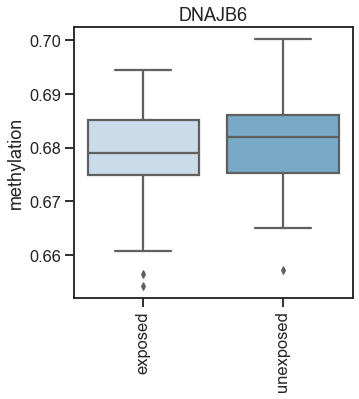

In [18]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(dnajb6[sample].mean())
        if "A" in sample:
            group_ids.append("exposed")
        elif "B" in sample:
            group_ids.append("exposed")
        else:
            group_ids.append("unexposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("DNAJB6")
plt.show()

In [19]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.632586
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      134
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:                 0.01136
Time:                        23:05:22   Log-Likelihood:                -86.032
converged:                       True   LL-Null:                       -87.021
Covariance Type:            nonrobust   LLR p-value:                    0.1596
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -23.8080     16.794     -1.418      0.156     -56.724       9.108
x1             34.0142    

In [20]:
wfdc9 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("WFDC9")]
wfdc9

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
409021,cg02605634,0.113334,0.159902,0.068926,0.104377,0.129400,0.147310,0.146927,0.132793,0.087766,...,0.131102,0.130721,0.146014,0.120691,0.098538,cg02605634,20,44258384.0,WFDC10A;WFDC9;WFDC10A,5'UTR;5'UTR;1stExon
411258,cg11764966,0.031182,0.052171,0.041682,0.058497,0.059252,0.044980,0.051978,0.045593,0.036511,...,0.043628,0.041038,0.035700,0.030103,0.046165,cg11764966,20,44258197.0,WFDC10A;WFDC9,TSS200;5'UTR
411335,cg12061127,0.931129,0.860589,0.836542,0.884768,0.858392,0.921663,0.880952,0.863667,0.868546,...,0.872364,0.916718,0.881837,0.887300,0.876877,cg12061127,20,44259912.0,WFDC9,TSS200
411501,cg12740857,0.930950,0.934638,0.929213,0.965772,0.964976,0.884783,0.942978,0.962137,0.952400,...,0.959924,0.978867,0.956254,0.914121,0.891490,cg12740857,20,44237356.0,WFDC9,Body
412036,cg15107861,0.067581,0.121393,0.052599,0.074874,0.103136,0.101959,0.113947,0.076452,0.050341,...,0.061090,0.065505,0.060406,0.070484,0.071433,cg15107861,20,44258271.0,WFDC10A;WFDC9,TSS200;5'UTR
412144,cg15638170,0.960140,0.951520,0.947414,0.951665,0.957452,0.956793,0.932485,0.951138,0.957451,...,0.964953,0.966497,0.979137,0.974218,0.956784,cg15638170,20,44261252.0,WFDC9,TSS1500
412309,cg16496526,0.054346,0.087476,0.054891,0.071109,0.077303,0.116511,0.073918,0.053295,0.062969,...,0.047873,0.044318,0.059895,0.056517,0.073186,cg16496526,20,44258267.0,WFDC10A;WFDC9,TSS200;5'UTR
412459,cg17133224,0.968651,0.968341,0.937345,0.968982,0.974884,0.939367,0.975840,0.970996,0.962313,...,0.965936,0.934348,0.953400,0.940906,0.967847,cg17133224,20,44236736.0,WFDC9,3'UTR
413116,cg20169185,0.929028,0.915661,0.917470,0.897175,0.950544,0.890978,0.929810,0.947463,0.922023,...,0.931203,0.857163,0.926004,0.910682,0.874654,cg20169185,20,44261389.0,WFDC9,TSS1500
414019,cg24337225,0.960590,0.924645,0.938589,0.944308,0.939078,0.972598,0.938031,0.927883,0.946999,...,0.948912,0.963561,0.965965,0.958981,0.946091,cg24337225,20,44259589.0,WFDC10A;WFDC9,Body;5'UTR


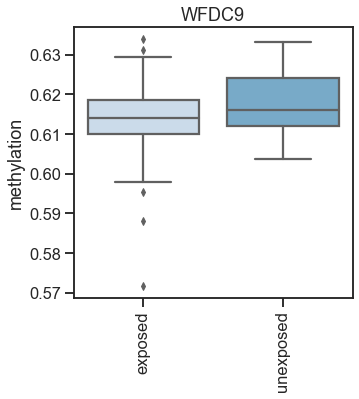

In [21]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(wfdc9[sample].mean())
        if "A" in sample:
            group_ids.append("exposed")
        elif "B" in sample:
            group_ids.append("exposed")
        else:
            group_ids.append("unexposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("WFDC9")
plt.show()

In [22]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.622358
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      134
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:                 0.02735
Time:                        23:05:57   Log-Likelihood:                -84.641
converged:                       True   LL-Null:                       -87.021
Covariance Type:            nonrobust   LLR p-value:                   0.02913
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -31.8559     15.078     -2.113      0.035     -61.407      -2.304
x1             50.6587    

In [23]:
oxct1 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("OXCT1")]
oxct1

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
29383,cg01060059,0.030957,0.213790,0.052960,0.050422,0.096224,0.049166,0.045432,0.038566,0.039759,...,0.104306,0.039776,0.056747,0.028645,0.032897,cg01060059,5,41870081.0,OXCT1,Body
33029,cg19435381,0.099895,0.058071,0.024452,0.035616,0.053950,0.061054,0.040118,0.036282,0.043392,...,0.046759,0.074759,0.033409,0.068419,0.035880,cg19435381,5,41870796.0,OXCT1,TSS200
33188,cg20405584,0.051161,0.075050,0.051782,0.056862,0.066830,0.060582,0.041655,0.065053,0.058496,...,0.053346,0.049680,0.055474,0.053620,0.050782,cg20405584,5,41870875.0,OXCT1,TSS200
200311,cg01186871,0.962262,0.961682,0.943284,0.955035,0.958441,0.963433,0.979907,0.967445,0.969111,...,0.975440,0.947281,0.956675,0.961038,0.957179,cg01186871,5,41868227.0,OXCT1,Body
201226,cg02389942,0.247411,0.335619,0.209958,0.222712,0.259524,0.324231,0.232623,0.193126,0.264219,...,0.247588,0.354824,0.376891,0.270061,0.166261,cg02389942,5,41869679.0,OXCT1,Body
201264,cg02441090,0.712193,0.782427,0.716564,0.754687,0.753645,0.810961,0.738742,0.757758,0.757445,...,0.767131,0.758530,0.823864,0.698777,0.714443,cg02441090,5,41871058.0,OXCT1,TSS1500
201838,cg03604312,0.941274,0.926429,0.956621,0.963472,0.946470,0.886723,0.958019,0.958230,0.946147,...,0.941376,0.895616,0.913136,0.934342,0.962123,cg03604312,5,41730687.0,OXCT1,3'UTR
202726,cg04981722,0.031592,0.030720,0.044614,0.039532,0.030518,0.048733,0.034275,0.029052,0.037064,...,0.020725,0.036298,0.041359,0.027582,0.042433,cg04981722,5,41870862.0,OXCT1,TSS200
203589,cg06537708,0.884868,0.905958,0.891344,0.900394,0.912063,0.935834,0.901949,0.936114,0.878154,...,0.922457,0.923821,0.947800,0.918290,0.899494,cg06537708,5,41871170.0,OXCT1,TSS1500
205014,cg08590939,0.092214,0.248375,0.081530,0.084555,0.118524,0.214585,0.124387,0.056222,0.078981,...,0.141573,0.152092,0.178943,0.095498,0.069021,cg08590939,5,41869963.0,OXCT1,Body


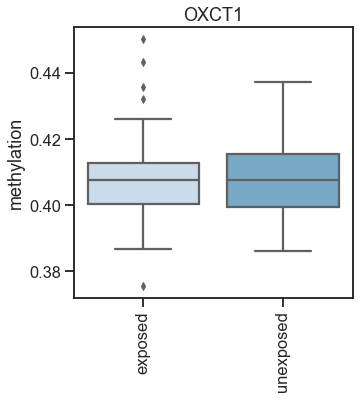

In [25]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(oxct1[sample].mean())
        if "A" in sample:
            group_ids.append("exposed")
        elif "B" in sample:
            group_ids.append("exposed")
        else:
            group_ids.append("unexposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("OXCT1")
plt.show()

In [26]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.639315
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      134
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:               0.0008493
Time:                        23:06:42   Log-Likelihood:                -86.947
converged:                       True   LL-Null:                       -87.021
Covariance Type:            nonrobust   LLR p-value:                    0.7006
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0539      6.196     -0.493      0.622     -15.199       9.091
x1              5.8432    